<a href="https://colab.research.google.com/github/GabrielChuchuca/EXAMEN1INTER-SIMULACION/blob/main/EXAMEN1INTERCICLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#pip install tweepy
import tweepy
from datetime import datetime, date, time, timedelta
import calendar
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import json

# Cómo conectar el cuaderno a la la Unidad de Google Drive
import os

# Importamos el paquete propio de Google Colab para acceder a la Unidad
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
consumer_key = "L6XdJhLezyZ98rm5mZIkhNYEn"
consumer_secret = "cNs8bWMG2QujCnJvKRaQXk98GhF97VASfvVqQeaPyms0AGarMv"
access_token = "1334387936847155200-1jrvfm9bnRV9nieDpkb6c44lS8JnCh" 
access_token_secret = "78ri5Nctcyf1j0DDYLswrKgVM8wWqtbb4CmrfTttu0Ran"

In [ ]:
#SE SETEA LOS VALORES DEL TOKEN
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
#SE CREA EL OBJETO API
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [ ]:
l_contenido = []
l_url = []
l_n_palabras = []
l_n_favoritos = []
l_n_dias_t = []
l_n_retweet = []
cont = 0
for tweet in tweepy.Cursor(api.search,q='guillermo lasso', lang="es",tweet_mode="extended").items(5000):
#for tweet in api.search(q="guillermo lasso", tweet_mode="extended", count="115"):
  if 'retweeted_status' in tweet._json:
    cont += 1
    print("IFFFFFFFF")
    print("TITULO/CONTENIDO")
    #print(tweet._json['retweeted_status']['full_text'])
    l_contenido.append(tweet.retweeted_status.full_text)
    
    print("URL DEL TWEET")
    #print("https://twitter.com/user/status/"+str(tweet.id))
    l_url.append("https://twitter.com/user/status/"+str(tweet.id))
    
    print("CANTIDAD DE PALABRAS DEL TWEET")
    a = tweet.retweeted_status.full_text.split()
    #print(len(a) - 1)
    l_n_palabras.append(len(a) - 1)
    
    print("CANTIDAD DE FAVORITOS DEL TWEET")
    #print(tweet._json['favorite_count'])
    l_n_favoritos.append(tweet.favorite_count)
    
    print("FECHA")
    f = datetime.today() - tweet.created_at
    #print(f.days)
    l_n_dias_t.append(f.days)
    
    print("CANTIDAD DE RETWEETS DEL TWEET")
    #print(tweet._json['retweet_count'])
    l_n_retweet.append(tweet.retweet_count)
    print("-------")
  else:
    cont += 1
    print("ELSEEEEEEEE")
    print("TITULO/CONTENIDO")
    #print(tweet._json['retweeted_status']['full_text'])
    l_contenido.append(tweet.full_text)
    print("URL DEL TWEET")
    #print("https://twitter.com/user/status/"+str(tweet.id))
    l_url.append("https://twitter.com/user/status/"+str(tweet.id))
    print("CANTIDAD DE PALABRAS DEL TWEET")
    a = tweet.full_text.split()
    #print(len(a) - 1)
    l_n_palabras.append(len(a) - 1)
    print("CANTIDAD DE FAVORITOS DEL TWEET")
    #print(tweet._json['favorite_count'])
    l_n_favoritos.append(tweet.favorite_count)
    print("FECHA")
    f = datetime.today() - tweet.created_at
    #print(f.days)
    l_n_dias_t.append(f.days)
    print("CANTIDAD DE RETWEETS DEL TWEET")
    #print(tweet._json['retweet_count'])
    l_n_retweet.append(tweet.retweet_count)
    print("-------")


print(cont)

Se han truncado las últimas 5000 líneas del flujo de salida.
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
ELSEEEEEEEE
TITULO/CONTENIDO
URL DEL TWEET
CA

Rate limit reached. Sleeping for: 856


Se han truncado las últimas 5000 líneas del flujo de salida.
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
ELSEEEEEEEE
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
ELSEEEEEEEE
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
ELSEEEEEEEE
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD DE PALABRAS DEL TWEET
CANTIDAD DE FAVORITOS DEL TWEET
FECHA
CANTIDAD DE RETWEETS DEL TWEET
-------
IFFFFFFFF
TITULO/CONTENIDO
URL DEL TWEET
CANTIDAD

In [ ]:
exa = {'contenido':l_contenido, 'url':l_url, '# de palabras':l_n_palabras, '# de favoritos':l_n_favoritos, '# de dias transcurridos':l_n_dias_t, '# de veces retweetiadas':l_n_retweet}
df = pd.DataFrame(data = exa)
df
#for i in df['url']:
#  print(i)

,contenido,url,# de palabras,# de favoritos,# de dias transcurridos,# de veces retweetiadas
0,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003427588801...,24,0,0,365
1,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003427179898...,24,0,0,365
2,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003425116342...,24,0,0,365
3,#Ecuador🇨🇴 El gobierno de Guillermo Lasso: ¿cr...,https://twitter.com/user/status/14003413694079...,15,0,0,18
4,#ENVIVO | El presidente Guillermo Lasso anunci...,https://twitter.com/user/status/14003413601007...,16,0,0,265
...,...,...,...,...,...,...
4995,".@LeonidasIzaSal1:""Nosotros no nos movilizamos...",https://twitter.com/user/status/13997314690404...,33,0,1,3
4996,🔴Guillermo Lasso durante la presentación del p...,https://twitter.com/user/status/13997314667503...,23,0,1,140
4997,"""Nunca más al servicio del partido del Gobiern...",https://twitter.com/user/status/13997314596913...,26,0,1,58
4998,Ecuador: presidente Lasso pide a empresas priv...,https://twitter.com/user/status/13997309667641...,12,0,1,10


In [ ]:
#df.to_csv('/content/drive/MyDrive/examen1ersimulacion/informacion_twitter.csv',index = False)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/examen1ersimulacion/informacion_twitter.csv')
#df2.columns = ['contenido','url','# de palabras','# de favoritos','dias transcurridos','# de retweets']
df2

,contenido,url,# de palabras,# de favoritos,# de dias transcurridos,# de veces retweetiadas
0,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003427588801...,24,0,0,365
1,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003427179898...,24,0,0,365
2,El presidente Guillermo Lasso exhortó a los ba...,https://twitter.com/user/status/14003425116342...,24,0,0,365
3,#Ecuador🇨🇴 El gobierno de Guillermo Lasso: ¿cr...,https://twitter.com/user/status/14003413694079...,15,0,0,18
4,#ENVIVO | El presidente Guillermo Lasso anunci...,https://twitter.com/user/status/14003413601007...,16,0,0,265
...,...,...,...,...,...,...
4995,".@LeonidasIzaSal1:""Nosotros no nos movilizamos...",https://twitter.com/user/status/13997314690404...,33,0,1,3
4996,🔴Guillermo Lasso durante la presentación del p...,https://twitter.com/user/status/13997314667503...,23,0,1,140
4997,"""Nunca más al servicio del partido del Gobiern...",https://twitter.com/user/status/13997314596913...,26,0,1,58
4998,Ecuador: presidente Lasso pide a empresas priv...,https://twitter.com/user/status/13997309667641...,12,0,1,10


In [ ]:
ll = []
for i in df2['# de veces retweetiadas']:
  ll.append(i)
print(max(ll))

9534


In [ ]:
df2.describe()

,# de palabras,# de favoritos,# de dias transcurridos,# de veces retweetiadas
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,27.782400,2.75800,0.338800,127.923000
std,10.987429,41.55278,0.473349,198.916489
min,3.000000,0.00000,0.000000,0.000000
25%,19.000000,0.00000,0.000000,6.000000
50%,24.000000,0.00000,0.000000,73.000000
75%,37.000000,0.00000,1.000000,206.000000
max,63.000000,1617.00000,1.000000,9534.000000


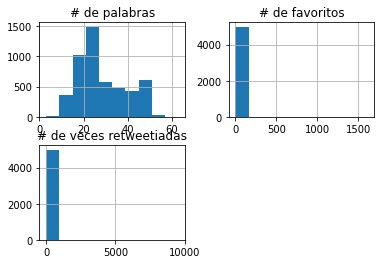

In [ ]:
# Visualizamos rápidamente las caraterísticas de entrada
df2.drop(['contenido','url', '# de dias transcurridos'],1).hist()
plt.show()

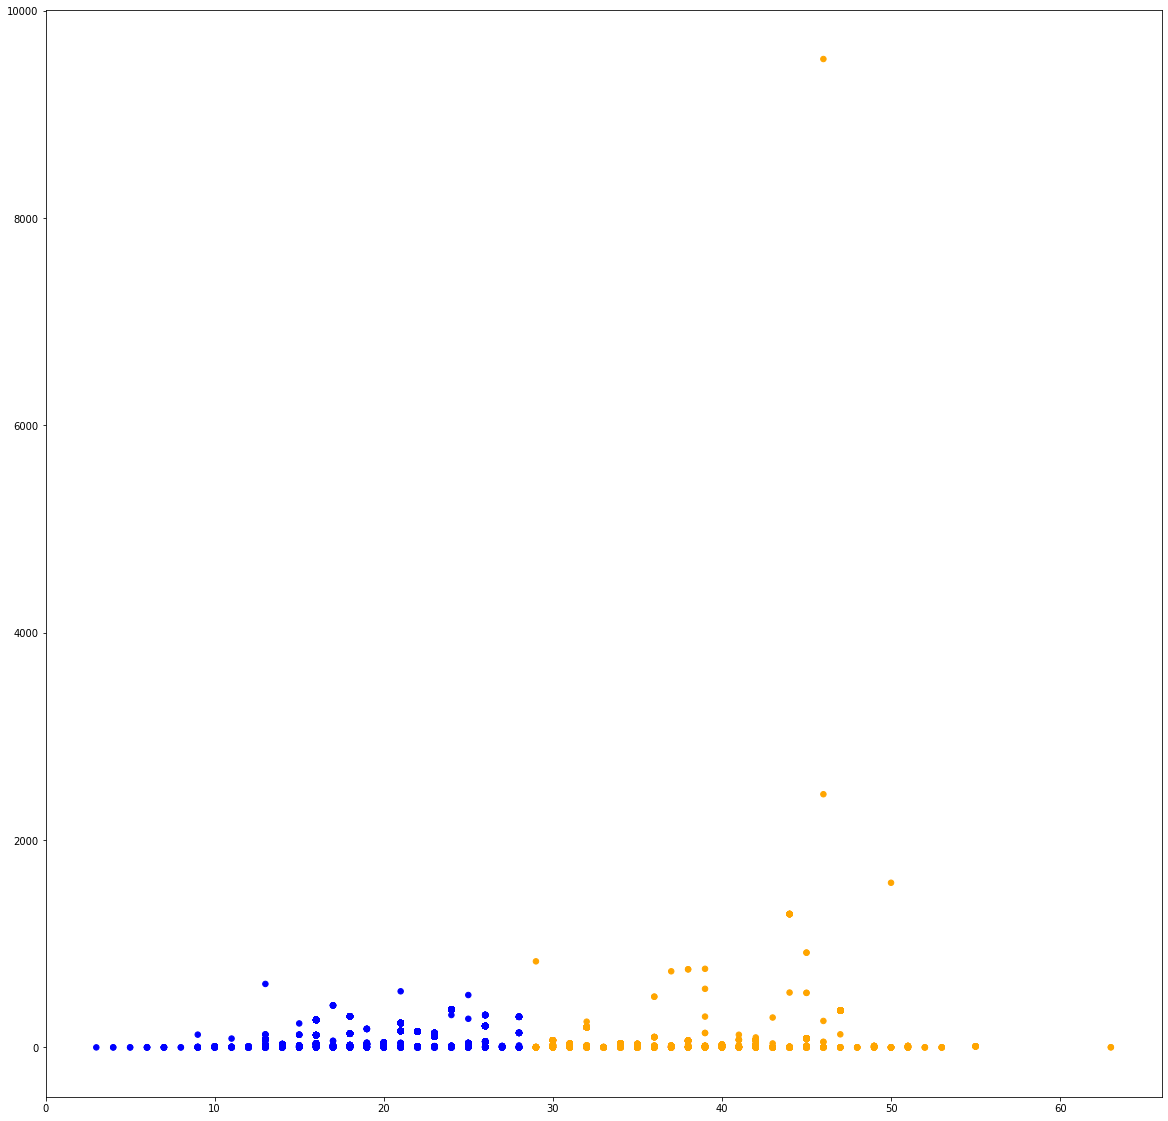

In [ ]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = df2[(df2['# de palabras'] <= 3500) & (df2['# de veces retweetiadas'] <= 80000)]

f1 = filtered_data['# de palabras'].values
f2 = filtered_data['# de veces retweetiadas'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['# de palabras']>28):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.gcf().set_size_inches(20, 20)
plt.show()

In [ ]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["# de palabras"]]
X_train = np.array(dataX)
y_train = filtered_data['# de veces retweetiadas'].values

In [ ]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.4f' % r2_score(y_train, y_pred))

Coefficients: 
 [1.13786139]
Independent term: 
 96.31047958549516
Mean squared error: 39403.58
Variance score: 0.0040


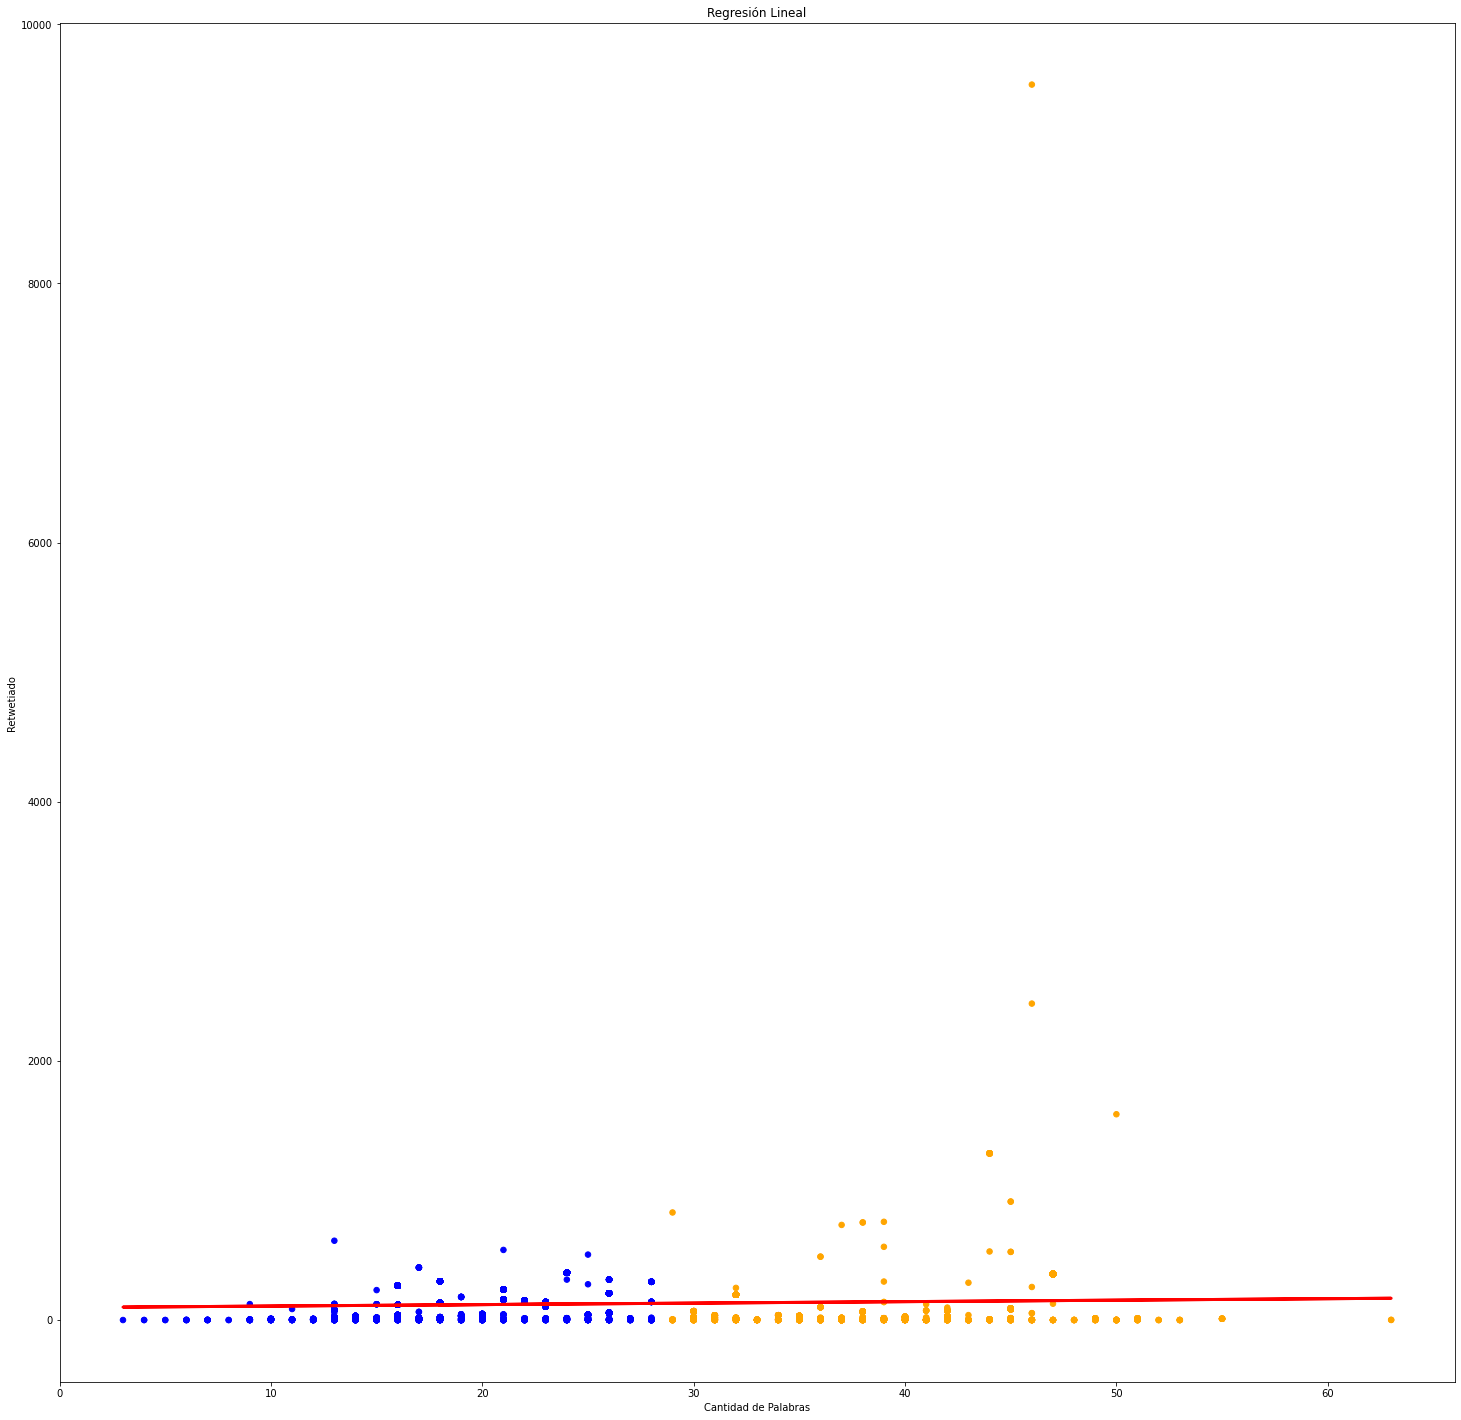

In [ ]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Retwetiado')
plt.title('Regresión Lineal')
plt.gcf().set_size_inches(25, 25)
plt.show()

In [ ]:
#Vamos a comprobar:
# Quiero predecir cuántos "Retweet" voy a obtener por un tweet con 63 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[63]])
print(int(y_Dosmil))

167


•	Posteriormente se debe seguir un procesos de vacunación en los recintos electorales que se describe a continuación:
  - Solo se va a tener en cuanta uno de los recintos electorales (investigar datos de cuantas personas asisten a votar).
  - Tomar los resultados de la regresión para la vacuna según la llegada.
  - Se tiene una promedio que el 80% de personas realizaran el proceso de vacunación dentro del Ecuador.
  - Dentro del procesos se tiene que alrededor del 5% - 10% no podrán vacunarse.
  - Las personas solo tiene un recinto electoral para realizar el proceso.
  - Las personas realizan la primera vacuna y 30 días después la segunda vacuna.
  - La persona se acerca a la mesa  y hacen fila en caso de ser necesario para recibir la vacuna.
  - Realiza la vacunación en un tiempo aleatorio entre 5 a 10 minutos.
  - Debe esperar 20 minutos dentro del establecimiento para verificar que no tenga problemas de salud.
  - La persona recibe su certificado de vacunación y la fecha de la próxima vacuna entre 2 – 3 minutos.
  - La persona sale del recinto electoral.
  - Regresan para la próxima fecha y se repite el ciclo.


## Recinto Investigado
  - Universidad de Cuenca - Av 12 de Abril y Av Loja
  - N Juntas: 28
  - Numero de Votantes: 9130
  - Numero de Votantes/Junta : 326

  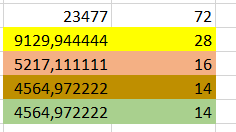

In [1]:
pip install simpy

In [23]:
import simpy
import random
from random import choice
import matplotlib.pyplot as pp

%matplotlib inline

In [27]:
type(choice(["con sintomas", "sin sintomas"]))

str

In [22]:
random.randint(0,1)

1

Tomamos en cuencta que las vacunas disponibes son 9150 para vacunar dentro de una semana 

In [3]:
# Maximo de vacunas
MAX_VACUNAS = 9150
# Total de numero de puntos de vacunacion
JUNTAS = 28
PACIENTES = 9130
# Intervalo de tiempo en que llegan los pacientes
INTERVALO_LLEGADA = 5 #minutos
# Tiempo de simulación
TIEMPO_SIMULACION = 775

# Creamos un diccionario para almacenar las horas en que se vacuna los pacientes
tiempo_vacunacion={}
#Diccionarios para almacenar la primera y segunda dosis
pri_dosis ={} #
seg_dosis = {} #
#Diccionario para el numero de pacientes que no han sido atendidos
p_no_vacunado = []

#Numero de vacunas aplicadas
n_vacunas_apli = 0 #

#Fecha inicial 30 dias, y se suma 1 dia.
fecha_inicial =30

In [30]:
class Recinto(object):
    def __init__(self, environment, num_mesas, nombre_recinto):
        # Guardamos como variable el entorno de ejecucion
        self.env=environment
        # Creamos el recurso que representa las mesas o juntas 
        self.mesas = simpy.Resource(environment, num_mesas)
        self.nombre_recinto = nombre_recinto

    # Segun UNICEF las personas que no se beberian vacunar son las que presentan alergias a los componentes
    # de las vacunas y las que presenten sintomas de COVID-19
    # Para validar si un paciente tiene sintomas o no haremos 
    def verificacion_sintomas(self, paciente, tam_no_vacunados, n_per_sintomas):
        estado = choice(["con sintomas", "sin sintomas"])
        if tam_no_vacunados<=n_per_sintomas and estado == "con sintomas":
            p_no_vacunado.append(paciente)
        return estado

    #La persona se acerca y hace fila para recibir la vacunacion de la primera dosis
    def pri_dosis(self, paciente, sintomas):
        if sintomas == "sin sintomas":
            t_vacunacion = random.randint(5,10) # ◦	Realiza la vacunación en un tiempo aleatorio entre 5 a 10 minutos.
            yield self.env.timeout(t_vacunacion)
            print("El paciente ", paciente, " ha sido vacunado con la primera dosis.")
            print("La aplicacion de la segunda dosis es luego de 30 dias")
            
            pri_dosis[paciente] = t_vacunacion
        else:
            print("El paciente ",paciente," presenta sintomas de COVID-19, por lo que no puede ser vacunado.")
    
    # lA APLIACION DE ESTA DOSIS ES DESPUES DE 30 DIAS APLICADA LA PRIMERA DOSIS
    def seg_dosis(self, paciente, sintomas):
        if sintomas == "sin sintomas":
            t_vacunacion = random.randint(5,10)
            yield self.env.timeout(t_vacunacion)
            print("El paciente ",paciente, "ha sido vacunado con la segunda dosis.")
            seg_dosis[paciente] = t_vacunacion
        else:
            print("El paciente ",paciente," tiene sintomas, por lo que no puede ser vacunado")

    #Debe esperar 20 minutos dentro del establecimiento para verificar que no tenga problemas de salud.
    def postverificacion_salud(self,paciente):
        post_t_espera = 20       
        yield self.env.timeout(post_t_espera)

    #La persona recibe su certificado de vacunación y la fecha de la próxima vacuna entre 2 – 3 minutos.
    def generar_certificado(self,paciente):
        t_salida = random.randint(2,3)        
        yield self.env.timeout(t_salida)

In [31]:
def llegada(env, paciente, punto, tam_no_vacunados, n_per_sintomas):
    # Usamos el reloj de la simulacion (env.now()) para indicar a la
    # hora que llega el vehiculo con el nombre pasado como parametro
    print('Llega el paciente: %s a la hora %.2f.' % (paciente, env.now))
 
    # Especificamos que vamos a usar un recurso (Resource) que representa
    with punto.mesas.request() as mesa:
        # Ocupamos la mesa de vacunacion
        yield mesa
        
        #Indicamos que el paciente se esta trasladando para ser vacunado
        print('Se traslada el paciente: %s a la hora %.2f.' % (paciente,env.now))
        
        #yield env.process(punto.examen_sintomas(paciente,tam_no_vacunados, n_per_sintomas))
        sintomas = punto.verificacion_sintomas(paciente, tam_no_vacunados, n_per_sintomas)
        
        print("Sintomas: ",sintomas)
        if sintomas == "sin sintomas":
            yield env.process(punto.pri_dosis(paciente, sintomas))
            print("El paciente %s esta en proceso para la primera dosis a las  %.2f."\
                 %(paciente,env.now))
            
            yield env.process(punto.postverificacion_salud(paciente))
            print("Se espero 20 min dentro del estableiceimtno desde las %.2f. \
            para el paciente %s"\
                  %(env.now,paciente))

            yield env.process(punto.generar_certificado(paciente))
            print("Se ha generado el certificado y fecha para la segunda dosis a las %.2f. \
            para el paciente %s"\
                  %(env.now,paciente))
        if sintomas == "sin sintomas":
            yield env.process(punto.seg_dosis(paciente, sintomas))
            print("El paciente %s esta en proceso para la segunda dosis a las  %.2f." \
                  % (paciente,env.now))

In [32]:
def simulacion(env, num_mesas, pacientes, intervalo):
    recinto = Recinto(env, num_mesas, "Universidad de Cuenca")
    #Genarado randomico porcentaje entre 5% y 10%  con sintomas
    p_sintomas = random.randint(5,10)
    print("Porcentaje de personas que tienen sintomas: ",p_sintomas,"%")

    #Calculado numero de personas con sintomas
    n_per_sintomas = int(pacientes/100*p_sintomas)
    print("Numero de personas que tienen sintomas: ",n_per_sintomas)
    
    #Numero de personas no vacunadas
    tam_no_vacunados = len(p_no_vacunado)

    for i in range(pacientes):
        env.process(llegada(
            env,'Paciente-%d'%(i+1),recinto,tam_no_vacunados,n_per_sintomas))
    while True:
        
        yield env.timeout(random.randint(intervalo-2,intervalo+2))
        i+=1
        env.process(llegada(env,'Paciente-%d'%(i+1),recinto,tam_no_vacunados,n_per_sintomas))

In [34]:
print("Punto de vacunacion en Cuenca")
# Creamos el entorno de simulacion
env=simpy.Environment()
print("# de Pacientes => ", PACIENTES)
env.process(simulacion(env, JUNTAS, PACIENTES, INTERVALO_LLEGADA))
# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = TIEMPO_SIMULACION)

Se han truncado las últimas 5000 líneas del flujo de salida.
El paciente Paciente-277 esta en proceso para la primera dosis a las  159.00.
El paciente  Paciente-258  ha sido vacunado con la primera dosis.
La aplicacion de la segunda dosis es luego de 30 dias
El paciente  Paciente-271  ha sido vacunado con la primera dosis.
La aplicacion de la segunda dosis es luego de 30 dias
El paciente  Paciente-274  ha sido vacunado con la primera dosis.
La aplicacion de la segunda dosis es luego de 30 dias
El paciente Paciente-258 esta en proceso para la primera dosis a las  160.00.
El paciente Paciente-271 esta en proceso para la primera dosis a las  160.00.
El paciente Paciente-274 esta en proceso para la primera dosis a las  160.00.
Llega el paciente: Paciente-9163 a la hora 161.00.
El paciente  Paciente-275  ha sido vacunado con la primera dosis.
La aplicacion de la segunda dosis es luego de 30 dias
El paciente  Paciente-279  ha sido vacunado con la primera dosis.
La aplicacion de la segunda do